# Explaining urbanization, step by step

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

This function gives us the indices of the N cells with the highest values from arrray (not necessarily ordered, but that doesn't matter for our purposes):

In [ ]:
def getIndicesOfTopNCells(N, arrrray):
    return np.argpartition(arrrray, -N)[-N:]

Construct a 10x10 matrix with random values as our urbanRural layer. As usual, 0=water, 1=rural, 2=urban:

In [58]:
urbanRural = np.random.random_integers(0,2,(10,10))
print urbanRural

[[1 1 1 2 2 1 1 2 1 1]
 [0 2 2 1 2 0 0 0 0 2]
 [1 1 0 1 1 2 2 2 0 0]
 [0 0 0 2 2 2 1 0 0 0]
 [2 2 0 1 1 2 0 1 2 2]
 [0 0 1 2 0 0 2 0 2 1]
 [1 1 2 2 0 0 0 0 2 0]
 [2 2 0 0 2 1 2 2 1 1]
 [1 0 1 1 1 2 2 0 0 2]
 [1 2 2 2 0 1 0 1 2 0]]


In the following map, blue is water, white is rural, red is urban:

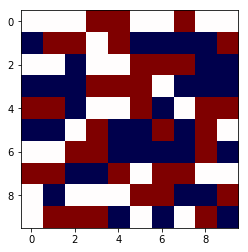

In [67]:
plt.imshow(urbanRural, cmap="seismic")
plt.show()

Do the same for population. We'll just assume population between 0 and 100 here, the actual numbers don't matter. We'll also set the population in water cells to 0, since nobody lives there:

In [60]:
population = np.random.random_integers(0,100,(10,10))
population[urbanRural == 0] = 0
print population

[[ 45  49  93  96  41   9  33  39  87  48]
 [  0  62  58  58  78   0   0   0   0  82]
 [ 72  58   0   9  41  85  84  72   0   0]
 [  0   0   0   0  26  30  35   0   0   0]
 [ 34   6   0  35  79  53   0  33 100  58]
 [  0   0  44  43   0   0  97   0  31  75]
 [ 17   2  27  65   0   0   0   0  96   0]
 [ 14  57   0   0   2  24  22  87   7  84]
 [ 70   0  92  90  76  71  28   0   0  12]
 [ 68  67  70  17   0   1   0  77  66   0]]


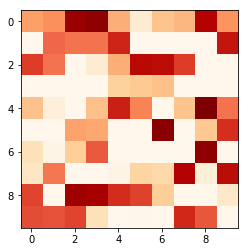

In [61]:
plt.imshow(population, cmap="OrRd")
plt.show()

Let's set some constants:

In [62]:
ruralCell = 1
urbanCell = 2

Next, we'll turn both of our layers into 1D arrays, because that's how we process our data in the actual code:

In [63]:
urbanRuralFlat = urbanRural.ravel()
populationFlat = population.ravel()

**Here's the trick**: We make a copy of the population raster, *where the population of all urban cells is set to 0*, so that they get ignored when we look for the n rural cells with the highest population number in the next step:

In [64]:
popCopy = np.copy(populationFlat)
popCopy[urbanRuralFlat == urbanCell] = 0

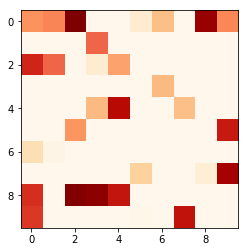

In [65]:
plt.imshow(popCopy.reshape(10,10), cmap="OrRd")
plt.show()

Now we can safely go ahead and pick the N cells with the highest values, because we know that the urban cells will be ignored because their population has been set to 0.

We'll use 5 cells here for the sake of demonstration; in the actual code, the number is based on the percentage of population increase.

In [66]:
convert = getIndicesOfTopNCells(5, popCopy)
convert

array([79,  8, 83,  2, 82])

Now we just need to take those indeces and turn the cells at those locations in the urbanRural layer from rural to urban. We'll plot the layer before and after to show the effect.

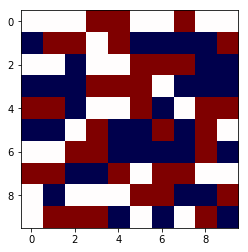

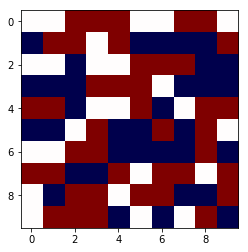

In [68]:
plt.imshow(urbanRural, cmap="seismic")
plt.show()

urbanRuralFlat[convert] = urbanCell

plt.imshow(urbanRural, cmap="seismic")
plt.show()

That's all folks ¯\_(ツ)_/¯